In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [ ]:

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional


In [ ]:
from IPython.core.pylabtools import figsize


In [ ]:
tf.random.set_seed(1234)

In [ ]:
from google.colab import files
uploaded = files.upload() 
df = pd.read_csv('jena_climate_2009_2016.csv',index_col='Date Time',parse_dates=False,on_bad_lines='skip')

Saving jena_climate_2009_2016.csv to jena_climate_2009_2016.csv


In [ ]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,996.913450,-7.654100,265.746385,-10.24691,82.579905,3.703465,2.982740,0.720785,1.865180,2.994740,1307.186565,1.444430,2.448340,169.226965
std,5.934153,5.565368,5.762211,4.99507,11.434871,1.446431,1.067682,0.761232,0.674438,1.081689,31.904942,1.196025,1.692322,72.018711
min,984.600000,-23.010000,250.600000,-25.01000,42.380000,0.950000,0.790000,0.150000,0.500000,0.800000,1237.060000,0.050000,0.250000,0.120000
25%,991.927500,-11.375000,261.730000,-13.00500,77.500000,2.550000,2.237500,0.240000,1.390000,2.240000,1283.367500,0.590000,1.130000,144.300000
50%,998.215000,-6.895000,266.335000,-9.69000,87.600000,3.640000,2.920000,0.420000,1.820000,2.930000,1305.080000,1.100000,2.000000,180.250000
75%,1002.352500,-3.335000,270.160000,-6.80750,90.400000,4.772500,3.660000,0.800000,2.290000,3.672500,1330.925000,1.980000,3.250000,207.800000
max,1005.710000,4.900000,278.940000,-2.04000,96.300000,8.670000,5.260000,4.940000,3.310000,5.310000,1383.380000,7.810000,10.880000,358.900000


In [ ]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [ ]:
df=df.iloc[:2000]

In [ ]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,996.913450,-7.654100,265.746385,-10.24691,82.579905,3.703465,2.982740,0.720785,1.865180,2.994740,1307.186565,1.444430,2.448340,169.226965
std,5.934153,5.565368,5.762211,4.99507,11.434871,1.446431,1.067682,0.761232,0.674438,1.081689,31.904942,1.196025,1.692322,72.018711
min,984.600000,-23.010000,250.600000,-25.01000,42.380000,0.950000,0.790000,0.150000,0.500000,0.800000,1237.060000,0.050000,0.250000,0.120000
25%,991.927500,-11.375000,261.730000,-13.00500,77.500000,2.550000,2.237500,0.240000,1.390000,2.240000,1283.367500,0.590000,1.130000,144.300000
50%,998.215000,-6.895000,266.335000,-9.69000,87.600000,3.640000,2.920000,0.420000,1.820000,2.930000,1305.080000,1.100000,2.000000,180.250000
75%,1002.352500,-3.335000,270.160000,-6.80750,90.400000,4.772500,3.660000,0.800000,2.290000,3.672500,1330.925000,1.980000,3.250000,207.800000
max,1005.710000,4.900000,278.940000,-2.04000,96.300000,8.670000,5.260000,4.940000,3.310000,5.310000,1383.380000,7.810000,10.880000,358.900000


In [ ]:
len(df)

2000

In [ ]:
df.fillna(df.mean(), inplace=True)
df[:] = np.nan_to_num(df)

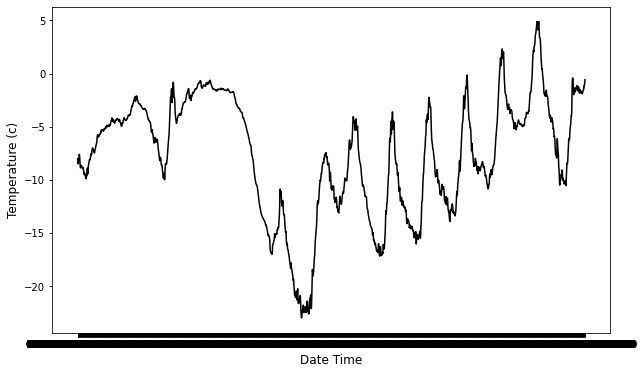

In [ ]:
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel(y_label, {'fontsize': 12})
timeseries(df.index, df['T (degC)'], 'Date Time','Temperature (c)')

In [ ]:
train_size = int(len(df)*0.7)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [ ]:

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

Dimension of train data:  (1400, 14)
Dimension of test data:  (600, 14)


In [ ]:
X_train = train_dataset.drop('T (degC)', axis = 1)
y_train = train_dataset.loc[:,['T (degC)']]

X_test = test_dataset.drop('T (degC)', axis = 1)
y_test = test_dataset.loc[:,['T (degC)']]

In [ ]:
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [ ]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 1
X_test, y_test = create_dataset(test_x_norm, test_y_norm,TIME_STEPS)
X_train, y_train = create_dataset(train_x_norm, train_y_norm,TIME_STEPS)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (599, 1, 13)
y_train.shape:  (1399, 1)
X_test.shape:  (599, 1, 13)
y_test.shape:  (1399, 1)


In [ ]:
def create_model_bilstm(units):
    model = Sequential()
    model.add(Bidirectional(LSTM(units = units,return_sequences=True),input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
model_bilstm = create_model_bilstm(64)

In [ ]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,validation_split = 0.2, batch_size = 32,shuffle = False, callbacks = [early_stop])
    return history
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
35/35 [==============================] - 9s 56ms/step - loss: 0.1953 - val_loss: 0.0214
Epoch 2/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0074 - val_loss: 0.0037
Epoch 3/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0042 - val_loss: 0.0054
Epoch 4/100
35/35 [==============================] - 0s 9ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 5/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0033
Epoch 6/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 7/100
35/35 [==============================] - 0s 8ms/step - loss: 0.0011 - val_loss: 6.5518e-04
Epoch 8/100
35/35 [==============================] - 0s 8ms/step - loss: 8.3838e-04 - val_loss: 5.7445e-04
Epoch 9/100
35/35 [==============================] - 0s 8ms/step - loss: 8.2534e-04 - val_loss: 8.0581e-04
Epoch 10/100
35/35 [==============================] - 0s 8ms/step - loss: 7.6751e-04 - v

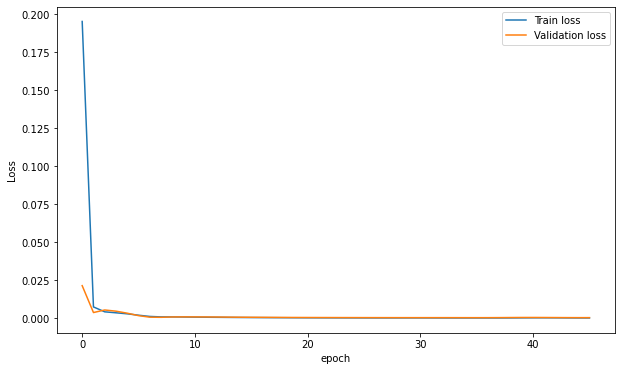

In [ ]:
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss (history_bilstm)

In [ ]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [ ]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction
prediction_bilstm = prediction(model_bilstm)

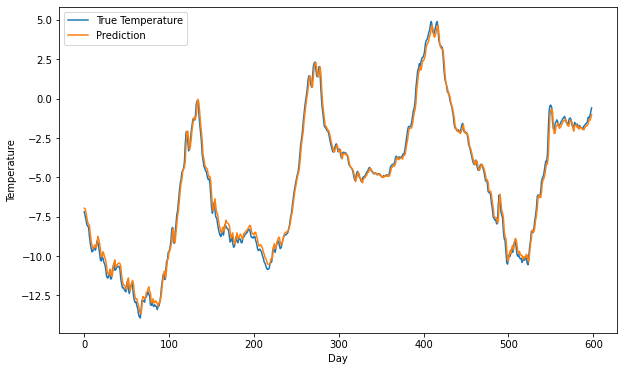

In [ ]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Temperature')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Day')
    plt.ylabel('Temperature')
plot_future(prediction_bilstm, y_test)

In [ ]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))

In [ ]:
evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')


Bidirectional LSTM:
Mean Absolute Error: 0.2848
Root Mean Square Error: 0.3598


In [ ]:
def create_datasetf (X, time_steps = 1):
    Xs = []
    for i in range(1):
        v = X[i:i+time_steps, :]
        Xs.append(v)
    return np.array(Xs)

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def predictionn(pressure,Tpot,TemperatureRelativeToHumidity,RelativeHumidity,SaturationVaporPressure,Vaporpressure,VaporPressureDeficit,SpecificHumidity,WaterVaporConcentration,DensityOfAir,WindSpeed,MaximumWindSpeed,WindDirection):
    arr = np.array([pressure,Tpot,TemperatureRelativeToHumidity,RelativeHumidity,SaturationVaporPressure,Vaporpressure,VaporPressureDeficit,SpecificHumidity,WaterVaporConcentration,DensityOfAir,WindSpeed,MaximumWindSpeed,WindDirection])
    arr=arr.reshape(1,-1)
    arr = input_scaler.transform(arr)
    TIME_STEPS = 1
    arr_test = create_datasetf(arr, TIME_STEPS)
    predictionn = model_bilstm.predict(arr_test)
    predictionn = scaler_y.inverse_transform(predictionn)
    return predictionn

In [ ]:
import gradio as gr
demo = gr.Interface(
    fn=predictionn,
    inputs=["number", "number", "number","number","number","number","number","number","number","number","number","number","number"],
    outputs=["number"],
    title="Jenna-Germany BiLSTM Temperature Prediction"
)
demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://23082.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"
